In [8]:
!pip install pandas
!pip install numpy

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [13]:
df = pd.read_csv('C:/Users/User/OneDrive/Masaüstü/DATA SCIENCE BOOTCAMP/Proje 1/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv')
print(df.head())

C:\Users\User\AppData\Local\Temp\ipykernel_101220\934211840.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/User/OneDrive/Masaüstü/DATA SCIENCE BOOTCAMP/Proje 1/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv')


        transit_timestamp transit_mode station_complex_id  \
0  10/18/2021 08:00:00 PM       subway                217   
1  10/18/2021 03:00:00 AM       subway                460   
2  10/18/2021 06:00:00 AM       subway                 86   
3  10/18/2021 03:00:00 PM       subway                 94   
4  10/18/2021 01:00:00 PM       subway                 64   

       station_complex   borough payment_method    fare_class_category  \
0         170 St (B,D)     Bronx      metrocard  Metrocard - Full Fare   
1  33 St-Rawson St (7)    Queens           omny       OMNY - Full Fare   
2    Cypress Hills (J)  Brooklyn      metrocard  Metrocard - Full Fare   
3        Halsey St (J)  Brooklyn           omny       OMNY - Full Fare   
4            71 St (D)  Brooklyn           omny       OMNY - Full Fare   

   ridership  transfers   latitude  longitude                Georeference  
0       22.0        2.0  40.839306  -73.91340  POINT (-73.9134 40.839306)  
1        1.0        0.0  40.744587  

In [15]:
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,10/18/2021 08:00:00 PM,subway,217,"170 St (B,D)",Bronx,metrocard,Metrocard - Full Fare,22.0,2.0,40.839306,-73.91340,POINT (-73.9134 40.839306)
1,10/18/2021 03:00:00 AM,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Full Fare,1.0,0.0,40.744587,-73.93100,POINT (-73.931 40.744587)
2,10/18/2021 06:00:00 AM,subway,86,Cypress Hills (J),Brooklyn,metrocard,Metrocard - Full Fare,40.0,0.0,40.689940,-73.87255,POINT (-73.87255 40.68994)
3,10/18/2021 03:00:00 PM,subway,94,Halsey St (J),Brooklyn,omny,OMNY - Full Fare,57.0,1.0,40.686370,-73.91656,POINT (-73.91656 40.68637)
4,10/18/2021 01:00:00 PM,subway,64,71 St (D),Brooklyn,omny,OMNY - Full Fare,21.0,0.0,40.619590,-73.99886,POINT (-73.99886 40.61959)
...,...,...,...,...,...,...,...,...,...,...,...,...
47448001,01/03/2024 05:00:00 AM,subway,606,"Court Sq (E,G,M,7)",Queens,metrocard,Metrocard - Unlimited 30-Day,11.0,0.0,40.747845,-73.94383,POINT (-73.94383 40{
47448002,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448003,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448004,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Problemli sütunun veri türlerini kontrol et
print(df.dtypes)

# Sütundaki benzersiz veri türlerini kontrol et (örneğin, sütun 2 "column_name" ise)
print(df['transit_timestamp'].apply(type).value_counts())


transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership              float64
transfers              float64
latitude               float64
longitude              float64
Georeference            object
dtype: object
transit_timestamp
<class 'str'>    47448006
Name: count, dtype: int64


In [19]:
# Problemli sütundaki eksik veya karmaşık verileri bul
invalid_data = df[df['transit_timestamp'].apply(lambda x: not isinstance(x, (int, float)))]
print(invalid_data)


                       transit_timestamp transit_mode station_complex_id  \
0                 10/18/2021 08:00:00 PM       subway                217   
1                 10/18/2021 03:00:00 AM       subway                460   
2                 10/18/2021 06:00:00 AM       subway                 86   
3                 10/18/2021 03:00:00 PM       subway                 94   
4                 10/18/2021 01:00:00 PM       subway                 64   
...                                  ...          ...                ...   
47448001          01/03/2024 05:00:00 AM       subway                606   
47448002                  "error" : true          NaN                NaN   
47448003    "message" : "Internal error"          NaN                NaN   
47448004                  "status" : 500          NaN                NaN   
47448005                               }          NaN                NaN   

              station_complex   borough payment_method  \
0                170 St (B,D)

In [19]:
df = pd.read_csv(
    'C:/Users/User/OneDrive/Masaüstü/DATA SCIENCE BOOTCAMP/Proje 1/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv',
    low_memory=False)


In [20]:
df.rename(columns={
    'transit_timestamp': 'datetime',
    'station_complex': 'station_name'
}, inplace=True)

print(df.columns)


Index(['datetime', 'transit_mode', 'station_complex_id', 'station_name',
       'borough', 'payment_method', 'fare_class_category', 'ridership',
       'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')


In [21]:
df

,datetime,transit_mode,station_complex_id,station_name,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,10/18/2021 08:00:00 PM,subway,217,"170 St (B,D)",Bronx,metrocard,Metrocard - Full Fare,22.0,2.0,40.839306,-73.91340,POINT (-73.9134 40.839306)
1,10/18/2021 03:00:00 AM,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Full Fare,1.0,0.0,40.744587,-73.93100,POINT (-73.931 40.744587)
2,10/18/2021 06:00:00 AM,subway,86,Cypress Hills (J),Brooklyn,metrocard,Metrocard - Full Fare,40.0,0.0,40.689940,-73.87255,POINT (-73.87255 40.68994)
3,10/18/2021 03:00:00 PM,subway,94,Halsey St (J),Brooklyn,omny,OMNY - Full Fare,57.0,1.0,40.686370,-73.91656,POINT (-73.91656 40.68637)
4,10/18/2021 01:00:00 PM,subway,64,71 St (D),Brooklyn,omny,OMNY - Full Fare,21.0,0.0,40.619590,-73.99886,POINT (-73.99886 40.61959)
...,...,...,...,...,...,...,...,...,...,...,...,...
47448001,01/03/2024 05:00:00 AM,subway,606,"Court Sq (E,G,M,7)",Queens,metrocard,Metrocard - Unlimited 30-Day,11.0,0.0,40.747845,-73.94383,POINT (-73.94383 40{
47448002,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448003,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448004,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


C:\Users\User\AppData\Local\Temp\ipykernel_101220\1462455539.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


In [27]:
# Geçersiz tarihleri bul
invalid_rows = df[~pd.to_datetime(df['datetime'], errors='coerce').notna()]
print(invalid_rows)


         datetime transit_mode station_complex_id station_name borough  \
47448002      NaT          NaN                NaN          NaN     NaN   
47448003      NaT          NaN                NaN          NaN     NaN   
47448004      NaT          NaN                NaN          NaN     NaN   
47448005      NaT          NaN                NaN          NaN     NaN   

         payment_method fare_class_category  ridership  transfers  latitude  \
47448002            NaN                 NaN        NaN        NaN       NaN   
47448003            NaN                 NaN        NaN        NaN       NaN   
47448004            NaN                 NaN        NaN        NaN       NaN   
47448005            NaN                 NaN        NaN        NaN       NaN   

          longitude Georeference  
47448002        NaN          NaN  
47448003        NaN          NaN  
47448004        NaN          NaN  
47448005        NaN          NaN  


In [29]:
# Eksik değer sayısını kontrol et
print(df.isna().sum())

# Bozuk veya eksik satırların yüzdesini kontrol et
print(df.isna().mean() * 100)

# Veri türlerini incele
print(df.info())


datetime               4
transit_mode           4
station_complex_id     4
station_name           4
borough                4
payment_method         4
fare_class_category    4
ridership              4
transfers              4
latitude               4
longitude              4
Georeference           4
dtype: int64
datetime               0.000008
transit_mode           0.000008
station_complex_id     0.000008
station_name           0.000008
borough                0.000008
payment_method         0.000008
fare_class_category    0.000008
ridership              0.000008
transfers              0.000008
latitude               0.000008
longitude              0.000008
Georeference           0.000008
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47448006 entries, 0 to 47448005
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   datetime             datetime64[ns]
 1   transit_mode         object        
 2   stat

In [39]:
# Bozuk değerleri kontrol et (örnek: 'error' yazan hücreler)
invalid_rows = df[(df == 'error').any(axis=1)]
print(invalid_rows)

# Geçersiz değerler olan satırların sayısını kontrol et
print(len(invalid_rows))


Empty DataFrame
Columns: [datetime, transit_mode, station_complex_id, station_name, borough, payment_method, fare_class_category, ridership, transfers, latitude, longitude, Georeference]
Index: []
0


In [35]:
# Eksik veri içeren satırları sil
df_cleaned = df.dropna()

# Belirli sütunlara göre eksik veri içeren satırları sil
df_cleaned = df.dropna(subset=['datetime', 'transit_mode', 'station_complex_id', 'station_name', 'borough', 'payment_method', 'fare_class_category', 'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'])

# Belirli bir değere (örnek: 'error') sahip satırları sil
df_cleaned = df[~(df == 'error').any(axis=1)]


In [37]:
df_cleaned

,datetime,transit_mode,station_complex_id,station_name,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2021-10-18 20:00:00,subway,217,"170 St (B,D)",Bronx,metrocard,Metrocard - Full Fare,22.0,2.0,40.839306,-73.91340,POINT (-73.9134 40.839306)
1,2021-10-18 03:00:00,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Full Fare,1.0,0.0,40.744587,-73.93100,POINT (-73.931 40.744587)
2,2021-10-18 06:00:00,subway,86,Cypress Hills (J),Brooklyn,metrocard,Metrocard - Full Fare,40.0,0.0,40.689940,-73.87255,POINT (-73.87255 40.68994)
3,2021-10-18 15:00:00,subway,94,Halsey St (J),Brooklyn,omny,OMNY - Full Fare,57.0,1.0,40.686370,-73.91656,POINT (-73.91656 40.68637)
4,2021-10-18 13:00:00,subway,64,71 St (D),Brooklyn,omny,OMNY - Full Fare,21.0,0.0,40.619590,-73.99886,POINT (-73.99886 40.61959)
...,...,...,...,...,...,...,...,...,...,...,...,...
47448001,2024-01-03 05:00:00,subway,606,"Court Sq (E,G,M,7)",Queens,metrocard,Metrocard - Unlimited 30-Day,11.0,0.0,40.747845,-73.94383,POINT (-73.94383 40{
47448002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448003,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


In [42]:
df_cleaned

,datetime,transit_mode,station_complex_id,station_name,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2021-10-18 20:00:00,subway,217,"170 St (B,D)",Bronx,metrocard,Metrocard - Full Fare,22.0,2.0,40.839306,-73.91340,POINT (-73.9134 40.839306)
1,2021-10-18 03:00:00,subway,460,33 St-Rawson St (7),Queens,omny,OMNY - Full Fare,1.0,0.0,40.744587,-73.93100,POINT (-73.931 40.744587)
2,2021-10-18 06:00:00,subway,86,Cypress Hills (J),Brooklyn,metrocard,Metrocard - Full Fare,40.0,0.0,40.689940,-73.87255,POINT (-73.87255 40.68994)
3,2021-10-18 15:00:00,subway,94,Halsey St (J),Brooklyn,omny,OMNY - Full Fare,57.0,1.0,40.686370,-73.91656,POINT (-73.91656 40.68637)
4,2021-10-18 13:00:00,subway,64,71 St (D),Brooklyn,omny,OMNY - Full Fare,21.0,0.0,40.619590,-73.99886,POINT (-73.99886 40.61959)
...,...,...,...,...,...,...,...,...,...,...,...,...
47448001,2024-01-03 05:00:00,subway,606,"Court Sq (E,G,M,7)",Queens,metrocard,Metrocard - Unlimited 30-Day,11.0,0.0,40.747845,-73.94383,POINT (-73.94383 40{
47448002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448003,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47448004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Başlangıç ve bitiş tarih-saatlerini tanımla
start_datetime = '2023-01-01 08:00:00'
end_datetime = '2024-01-03 05:00:00'

# Tarih ve saat aralığı filtresi uygula
filtered_df = df_cleaned[(df_cleaned['datetime'] >= start_datetime) & (df_cleaned['datetime'] <= end_datetime)]


In [46]:
filtered_df

,datetime,transit_mode,station_complex_id,station_name,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
2357538,2023-01-16 02:00:00,subway,311,86 St (1),Manhattan,omny,OMNY - Full Fare,3.0,0.0,40.788643,-73.976220,POINT (-73.97622 40.788643)
2359906,2023-01-16 14:00:00,subway,218,"167 St (B,D)",Bronx,omny,OMNY - Full Fare,60.0,1.0,40.833770,-73.918440,POINT (-73.91844 40.83377)
2360157,2023-01-16 18:00:00,subway,309,103 St (1),Manhattan,omny,OMNY - Full Fare,187.0,3.0,40.799446,-73.968376,POINT (-73.968376 40.799446)
2411217,2023-01-16 08:00:00,subway,160,"72 St (C,B)",Manhattan,metrocard,Metrocard - Fair Fare,2.0,0.0,40.775593,-73.976410,POINT (-73.97641 40.775593)
2411221,2023-01-16 05:00:00,subway,159,"81 St-Museum of Natural History (C,B)",Manhattan,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.781433,-73.972145,POINT (-73.972145 40.781433)
...,...,...,...,...,...,...,...,...,...,...,...,...
47447984,2024-01-03 05:00:00,subway,407,Astor Pl (6),Manhattan,omny,OMNY - Full Fare,13.0,0.0,40.730053,-73.991070,POINT (-73.99107 40.730053)
47447987,2024-01-03 02:00:00,subway,607,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,metrocard,Metrocard - Full Fare,19.0,0.0,40.749718,-73.987820,POINT (-73.98782 40.749718)
47447990,2024-01-03 05:00:00,subway,46,Cortelyou Rd (Q),Brooklyn,metrocard,Metrocard - Fair Fare,3.0,0.0,40.640926,-73.963890,POINT (-73.96389 40.640926)
47447992,2024-01-03 00:00:00,subway,397,"86 St (4,5,6)",Manhattan,metrocard,Metrocard - Other,6.0,0.0,40.779490,-73.955590,POINT (-73.95559 40.77949)


In [48]:
# Başlangıç ve bitiş tarih-saatlerini tanımla
start_datetime = '2023-01-01 08:00:00'
end_datetime = '2024-01-03 05:00:00'

# Tarih ve saat aralığı filtresi uygula ve df_nyc olarak yeniden adlandır
df_nyc = df_cleaned[(df_cleaned['datetime'] >= start_datetime) & (df_cleaned['datetime'] <= end_datetime)]

# Sonuç
print(df_nyc.shape)  # df_nyc'in satır ve sütun sayısını yazdırır
print(df_nyc.head())  # df_nyc'in ilk 5 satırını gösterir


(7160677, 12)
                   datetime transit_mode station_complex_id  \
2357538 2023-01-16 02:00:00       subway                311   
2359906 2023-01-16 14:00:00       subway                218   
2360157 2023-01-16 18:00:00       subway                309   
2411217 2023-01-16 08:00:00       subway                160   
2411221 2023-01-16 05:00:00       subway                159   

                                  station_name    borough payment_method  \
2357538                              86 St (1)  Manhattan           omny   
2359906                           167 St (B,D)      Bronx           omny   
2360157                             103 St (1)  Manhattan           omny   
2411217                            72 St (C,B)  Manhattan      metrocard   
2411221  81 St-Museum of Natural History (C,B)  Manhattan      metrocard   

                      fare_class_category  ridership  transfers   latitude  \
2357538                  OMNY - Full Fare        3.0        0.0  40.7886

In [50]:
df_nyc

,datetime,transit_mode,station_complex_id,station_name,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
2357538,2023-01-16 02:00:00,subway,311,86 St (1),Manhattan,omny,OMNY - Full Fare,3.0,0.0,40.788643,-73.976220,POINT (-73.97622 40.788643)
2359906,2023-01-16 14:00:00,subway,218,"167 St (B,D)",Bronx,omny,OMNY - Full Fare,60.0,1.0,40.833770,-73.918440,POINT (-73.91844 40.83377)
2360157,2023-01-16 18:00:00,subway,309,103 St (1),Manhattan,omny,OMNY - Full Fare,187.0,3.0,40.799446,-73.968376,POINT (-73.968376 40.799446)
2411217,2023-01-16 08:00:00,subway,160,"72 St (C,B)",Manhattan,metrocard,Metrocard - Fair Fare,2.0,0.0,40.775593,-73.976410,POINT (-73.97641 40.775593)
2411221,2023-01-16 05:00:00,subway,159,"81 St-Museum of Natural History (C,B)",Manhattan,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.781433,-73.972145,POINT (-73.972145 40.781433)
...,...,...,...,...,...,...,...,...,...,...,...,...
47447984,2024-01-03 05:00:00,subway,407,Astor Pl (6),Manhattan,omny,OMNY - Full Fare,13.0,0.0,40.730053,-73.991070,POINT (-73.99107 40.730053)
47447987,2024-01-03 02:00:00,subway,607,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,metrocard,Metrocard - Full Fare,19.0,0.0,40.749718,-73.987820,POINT (-73.98782 40.749718)
47447990,2024-01-03 05:00:00,subway,46,Cortelyou Rd (Q),Brooklyn,metrocard,Metrocard - Fair Fare,3.0,0.0,40.640926,-73.963890,POINT (-73.96389 40.640926)
47447992,2024-01-03 00:00:00,subway,397,"86 St (4,5,6)",Manhattan,metrocard,Metrocard - Other,6.0,0.0,40.779490,-73.955590,POINT (-73.95559 40.77949)


In [67]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7160677 entries, 2357538 to 47448001
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   datetime             datetime64[ns]
 1   transit_mode         object        
 2   station_complex_id   object        
 3   station_name         object        
 4   borough              object        
 5   payment_method       object        
 6   fare_class_category  object        
 7   ridership            float64       
 8   transfers            float64       
 9   latitude             float64       
 10  longitude            float64       
 11  Georeference         object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 710.2+ MB


In [52]:
df_nyc.describe()

,datetime,ridership,transfers,latitude,longitude
count,7160677,7.160677e+06,7.160677e+06,7.160677e+06,7.160677e+06
mean,2023-07-03 10:58:57.437309952,3.368012e+01,1.131776e+00,4.073275e+01,-7.393643e+01
min,2023-01-01 08:00:00,1.000000e+00,0.000000e+00,4.057613e+01,-7.407484e+01
25%,2023-04-01 17:00:00,3.000000e+00,0.000000e+00,4.067834e+01,-7.398174e+01
50%,2023-07-03 09:00:00,9.000000e+00,0.000000e+00,4.072591e+01,-7.394891e+01
75%,2023-10-01 23:00:00,2.500000e+01,0.000000e+00,4.079060e+01,-7.390103e+01
max,2024-01-03 05:00:00,1.252100e+04,1.129000e+03,4.090313e+01,-7.375540e+01
std,NaN,1.104948e+02,7.101617e+00,7.717851e-02,5.585018e-02


In [54]:
df_nyc.borough.value_counts()

borough
Brooklyn         2543292
Manhattan        2265163
Queens           1237426
Bronx            1087141
Staten Island      27655
Name: count, dtype: int64

In [79]:
df_nyc.transit_mode.value_counts()

transit_mode
subway                   7103995
tram                       29027
staten_island_railway      27655
Name: count, dtype: int64

In [82]:
df_nyc.station_name.value_counts()

station_name
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      22967
Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)          22460
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)    22430
Grand Central-42 St (S,4,5,6,7)                       22063
14 St-Union Sq (L,N,Q,R,W,4,5,6)                      21949
                                                      ...  
Avenue X (F)                                           6788
Avenue U (F)                                           6479
Neptune Av (F)                                         5631
Beach 105 St (A,S)                                     4879
Broad Channel (A,S)                                    4853
Name: count, Length: 428, dtype: int64

In [56]:
df_nyc

,datetime,transit_mode,station_complex_id,station_name,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
2357538,2023-01-16 02:00:00,subway,311,86 St (1),Manhattan,omny,OMNY - Full Fare,3.0,0.0,40.788643,-73.976220,POINT (-73.97622 40.788643)
2359906,2023-01-16 14:00:00,subway,218,"167 St (B,D)",Bronx,omny,OMNY - Full Fare,60.0,1.0,40.833770,-73.918440,POINT (-73.91844 40.83377)
2360157,2023-01-16 18:00:00,subway,309,103 St (1),Manhattan,omny,OMNY - Full Fare,187.0,3.0,40.799446,-73.968376,POINT (-73.968376 40.799446)
2411217,2023-01-16 08:00:00,subway,160,"72 St (C,B)",Manhattan,metrocard,Metrocard - Fair Fare,2.0,0.0,40.775593,-73.976410,POINT (-73.97641 40.775593)
2411221,2023-01-16 05:00:00,subway,159,"81 St-Museum of Natural History (C,B)",Manhattan,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.781433,-73.972145,POINT (-73.972145 40.781433)
...,...,...,...,...,...,...,...,...,...,...,...,...
47447984,2024-01-03 05:00:00,subway,407,Astor Pl (6),Manhattan,omny,OMNY - Full Fare,13.0,0.0,40.730053,-73.991070,POINT (-73.99107 40.730053)
47447987,2024-01-03 02:00:00,subway,607,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,metrocard,Metrocard - Full Fare,19.0,0.0,40.749718,-73.987820,POINT (-73.98782 40.749718)
47447990,2024-01-03 05:00:00,subway,46,Cortelyou Rd (Q),Brooklyn,metrocard,Metrocard - Fair Fare,3.0,0.0,40.640926,-73.963890,POINT (-73.96389 40.640926)
47447992,2024-01-03 00:00:00,subway,397,"86 St (4,5,6)",Manhattan,metrocard,Metrocard - Other,6.0,0.0,40.779490,-73.955590,POINT (-73.95559 40.77949)


In [65]:
neighborhoods = df_nyc.groupby('borough')['ridership'].mean().sort_values(ascending=False)
neighborhoods

borough
Manhattan        60.526714
Queens           27.698544
Brooklyn         21.455949
Bronx            13.774617
Staten Island     9.076984
Name: ridership, dtype: float64

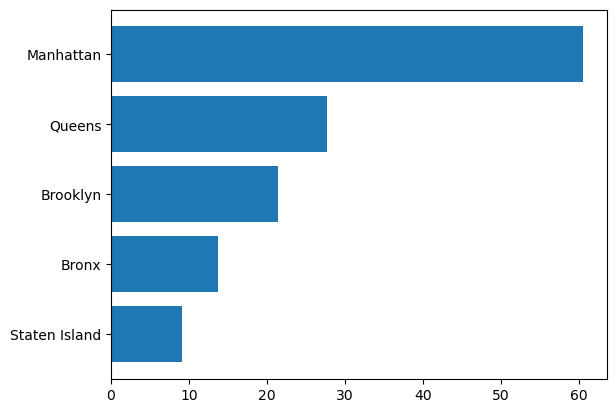

In [69]:
plt.barh(neighborhoods[:10].sort_values().index, neighborhoods[:10].sort_values().values);

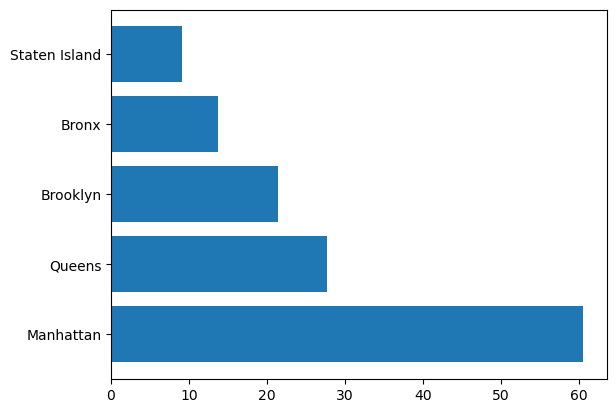

In [71]:
plt.barh(neighborhoods.index, neighborhoods.values);

In [73]:
df_nyc['station_name'].value_counts()

station_name
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      22967
Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)          22460
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)    22430
Grand Central-42 St (S,4,5,6,7)                       22063
14 St-Union Sq (L,N,Q,R,W,4,5,6)                      21949
                                                      ...  
Avenue X (F)                                           6788
Avenue U (F)                                           6479
Neptune Av (F)                                         5631
Beach 105 St (A,S)                                     4879
Broad Channel (A,S)                                    4853
Name: count, Length: 428, dtype: int64

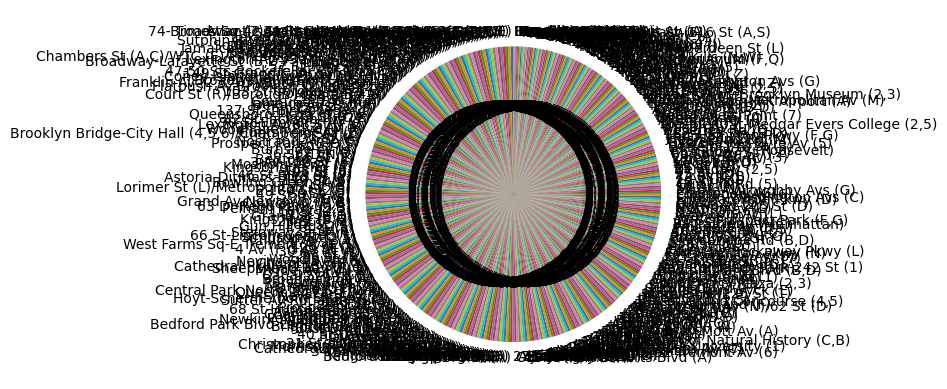

In [75]:
plt.pie(df['station_name'].value_counts().values, labels=df['station_name'].value_counts().index, autopct='%.1f%%', startangle=90);

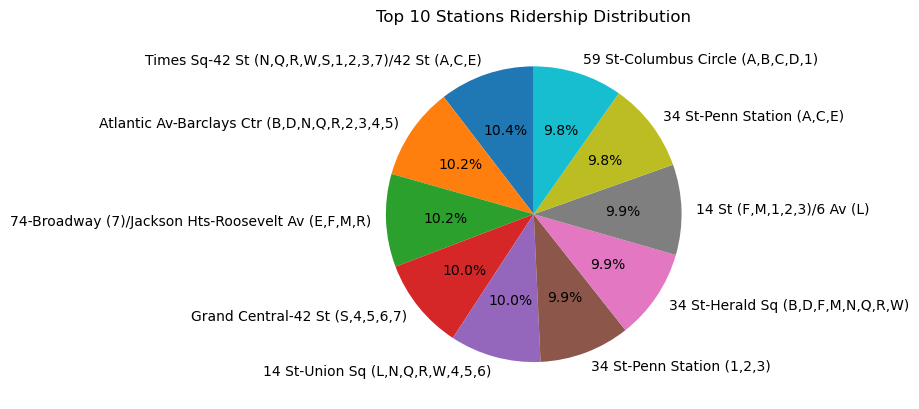

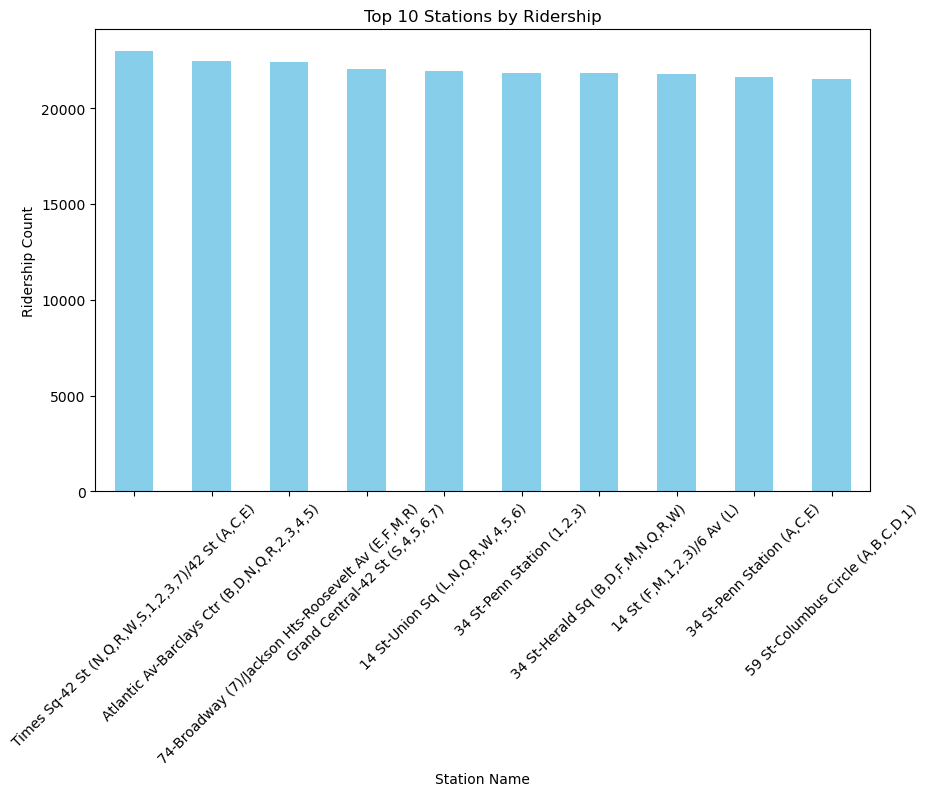

In [77]:
# En yoğun 10 durağı al
top_10_stations = df_nyc['station_name'].value_counts().head(10)

# Pasta grafiği
plt.pie(top_10_stations.values, labels=top_10_stations.index, autopct='%.1f%%', startangle=90)
plt.title('Top 10 Stations Ridership Distribution')
plt.show()

# Bar grafiği
top_10_stations.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Stations by Ridership')
plt.ylabel('Ridership Count')
plt.xlabel('Station Name')
plt.xticks(rotation=45)
plt.show()


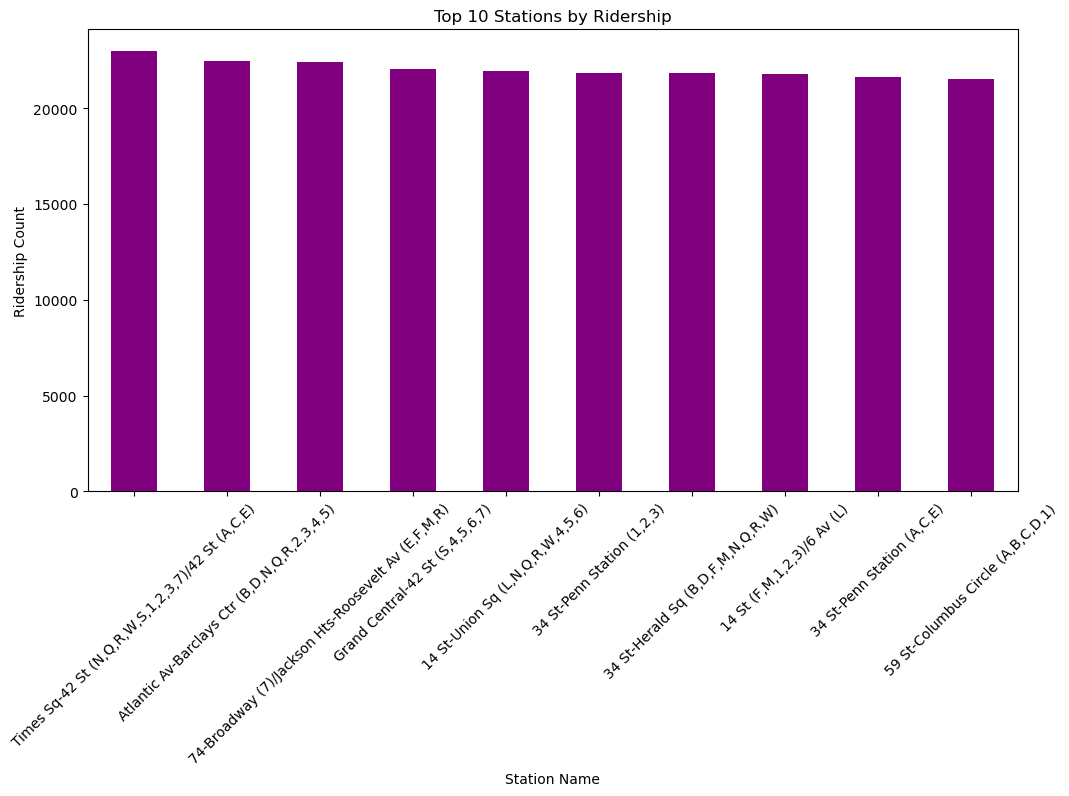

In [79]:
top_10_stations.plot(kind='bar', color='purple', figsize=(12, 6))
plt.title('Top 10 Stations by Ridership')
plt.ylabel('Ridership Count')
plt.xlabel('Station Name')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

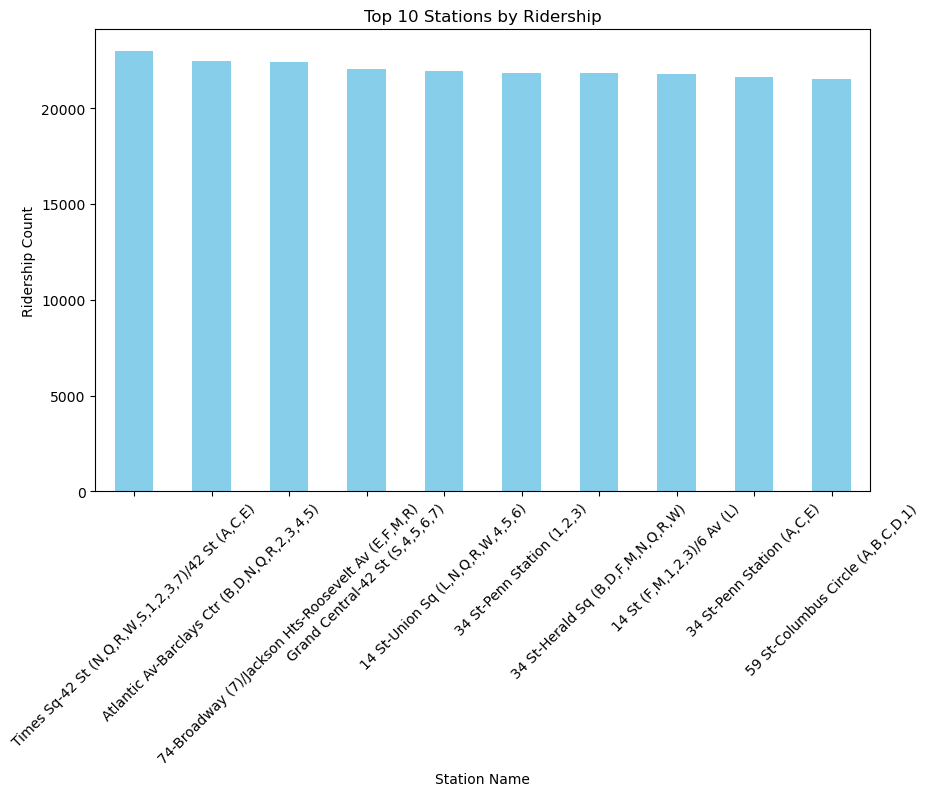

In [96]:
# Örnek grafik
top_10_stations = df_nyc['station_name'].value_counts().head(10)
top_10_stations.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Grafik ayarları
plt.title('Top 10 Stations by Ridership')
plt.ylabel('Ridership Count')
plt.xlabel('Station Name')
plt.xticks(rotation=45)

# Grafik görüntüsünü kaydetme (yüksek çözünürlükte)
plt.savefig('top_10_stations.png', dpi=300, bbox_inches='tight')  # 300 dpi ile kaydeder
plt.show()


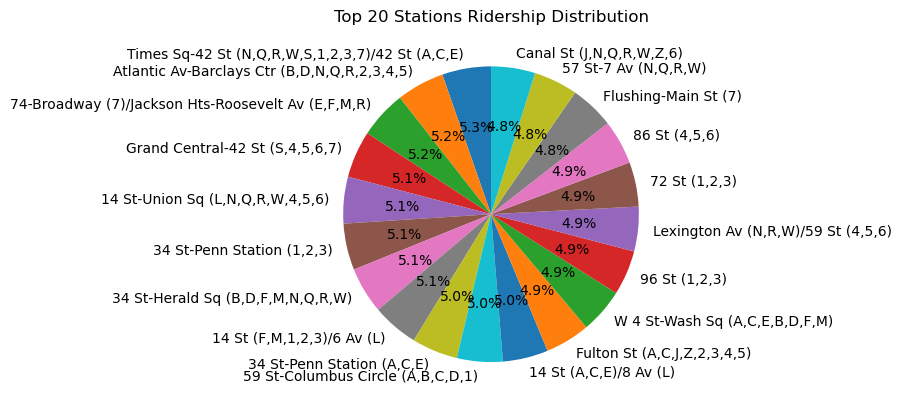

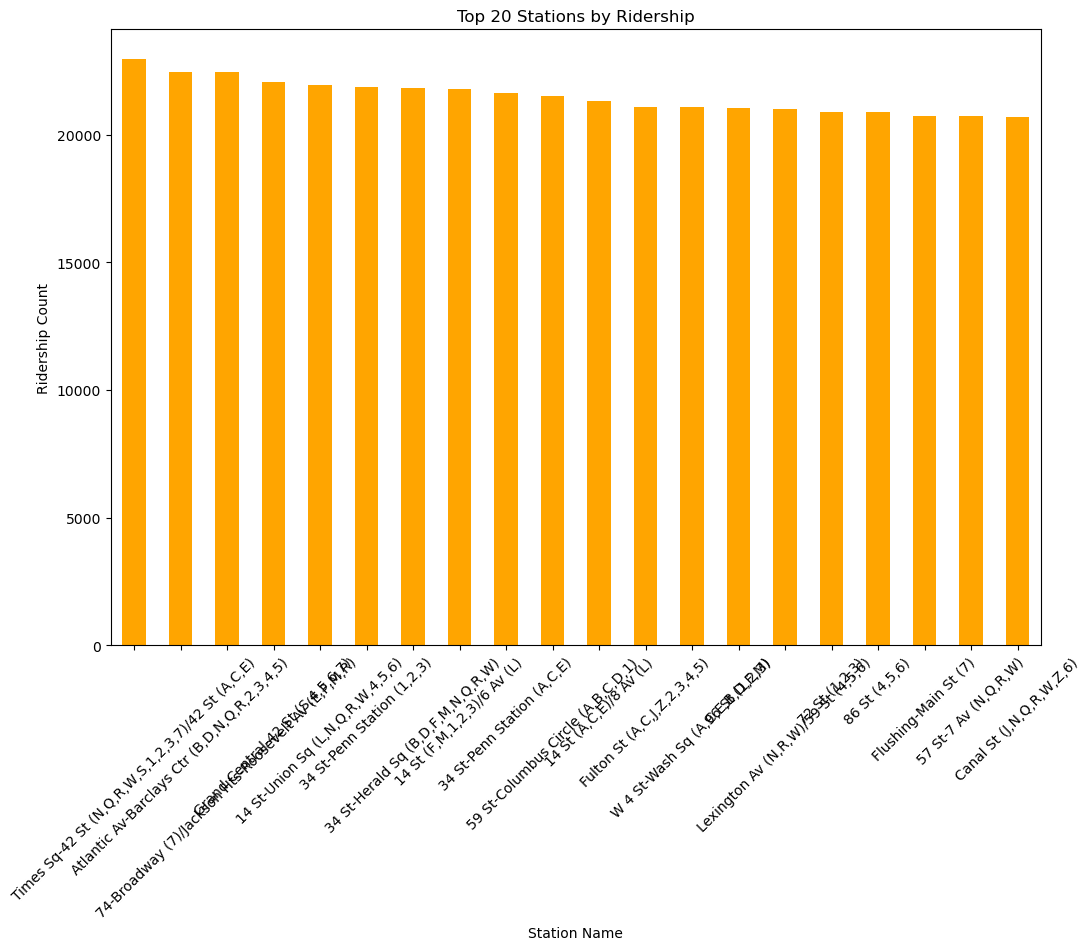

<Figure size 640x480 with 0 Axes>

In [92]:
# En yoğun 20 durağı al
top_20_stations = df_nyc['station_name'].value_counts().head(20)

# Pasta grafiği
plt.pie(top_20_stations.values, labels=top_20_stations.index, autopct='%.1f%%', startangle=90)
plt.title('Top 20 Stations Ridership Distribution')
plt.show()

# Bar grafiği
top_20_stations.plot(kind='bar', color='orange', figsize=(12, 8))
plt.title('Top 20 Stations by Ridership')
plt.ylabel('Ridership Count')
plt.xlabel('Station Name')
plt.xticks(rotation=45)
plt.show()

plt.savefig('top_20_stations.png', dpi=300, bbox_inches='tight')  # 300 dpi ile kaydeder
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_101220\666150485.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='borough', y='ridership', data=data, palette='muted')


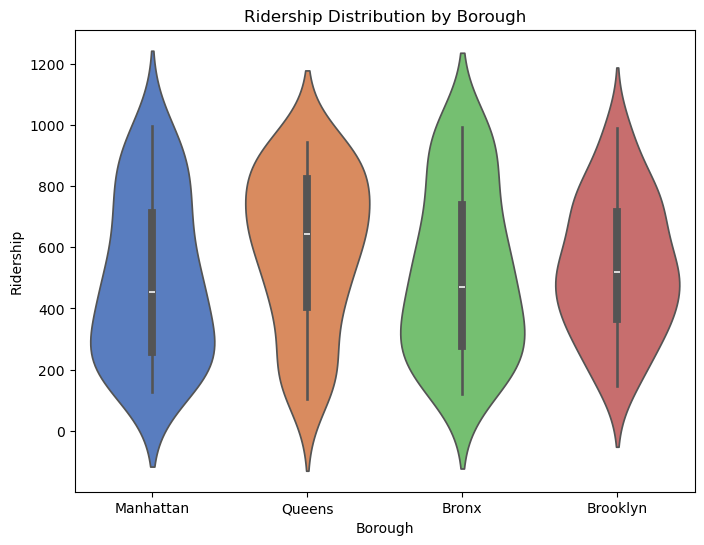

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek bir DataFrame oluştur
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'borough': np.random.choice(['Manhattan', 'Brooklyn', 'Queens', 'Bronx'], size=200),
    'ridership': np.random.randint(100, 1000, size=200)
})

# Violin chart
plt.figure(figsize=(8, 6))
sns.violinplot(x='borough', y='ridership', data=data, palette='muted')
plt.title('Ridership Distribution by Borough')
plt.ylabel('Ridership')
plt.xlabel('Borough')
plt.show()


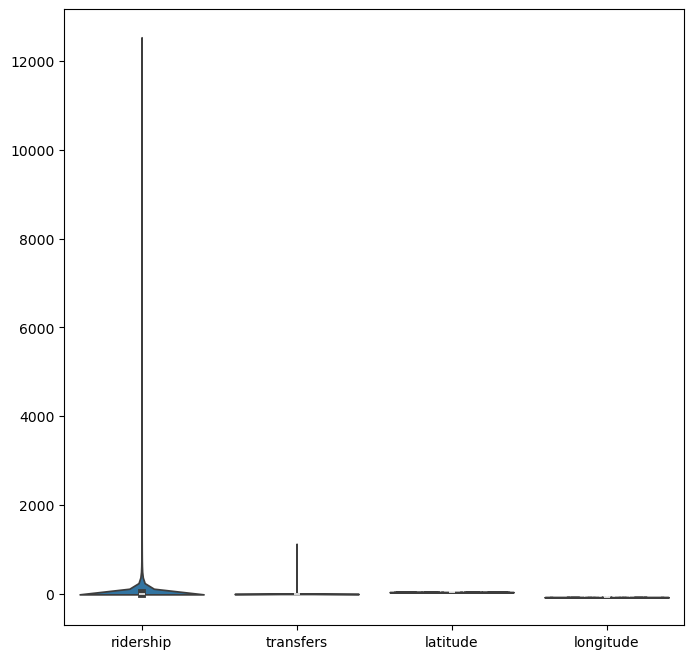

In [104]:
plt.figure(figsize=[8,8])
sns.violinplot(data=df_nyc);

In [105]:
plt.savefig('violin_chart.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

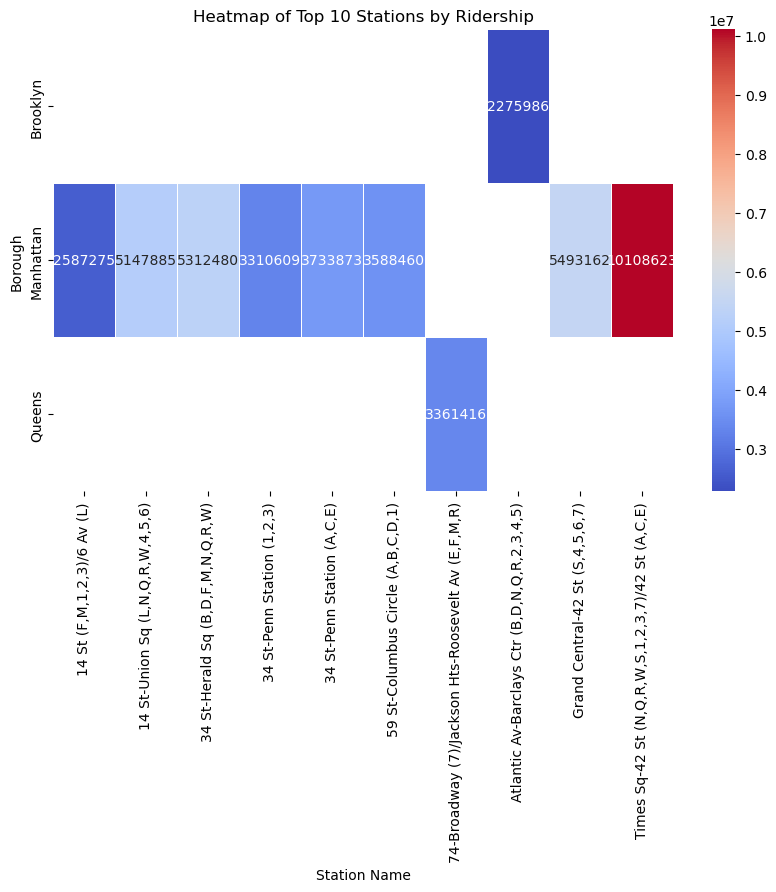

In [106]:
top_stations = df_nyc['station_name'].value_counts().head(10).index
filtered_data = df_nyc[df_nyc['station_name'].isin(top_stations)]

heatmap_data_filtered = filtered_data.pivot_table(values='ridership', index='borough', columns='station_name', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_filtered, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Top 10 Stations by Ridership')
plt.xlabel('Station Name')
plt.ylabel('Borough')
plt.show()


In [114]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlayın
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')  # Heatmap oluşturun
plt.title('My Heatmap')
plt.savefig('heatmap_nyc.png', dpi=300, bbox_inches='tight')  # Kaydedin
plt.show()  # Grafiği gösterin


NameError: name 'heatmap_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [117]:
top_10_stations = df_nyc['station_name'].value_counts().head(10)
top_10_boroughs = df_nyc['borough'].value_counts().head(10)

# Top 10 Duraklar
print(top_10_stations)

# Top 10 Mahalleler
print(top_10_boroughs)


station_name
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      22967
Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)          22460
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)    22430
Grand Central-42 St (S,4,5,6,7)                       22063
14 St-Union Sq (L,N,Q,R,W,4,5,6)                      21949
34 St-Penn Station (1,2,3)                            21853
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                     21838
14 St (F,M,1,2,3)/6 Av (L)                            21783
34 St-Penn Station (A,C,E)                            21624
59 St-Columbus Circle (A,B,C,D,1)                     21514
Name: count, dtype: int64
borough
Brooklyn         2543292
Manhattan        2265163
Queens           1237426
Bronx            1087141
Staten Island      27655
Name: count, dtype: int64


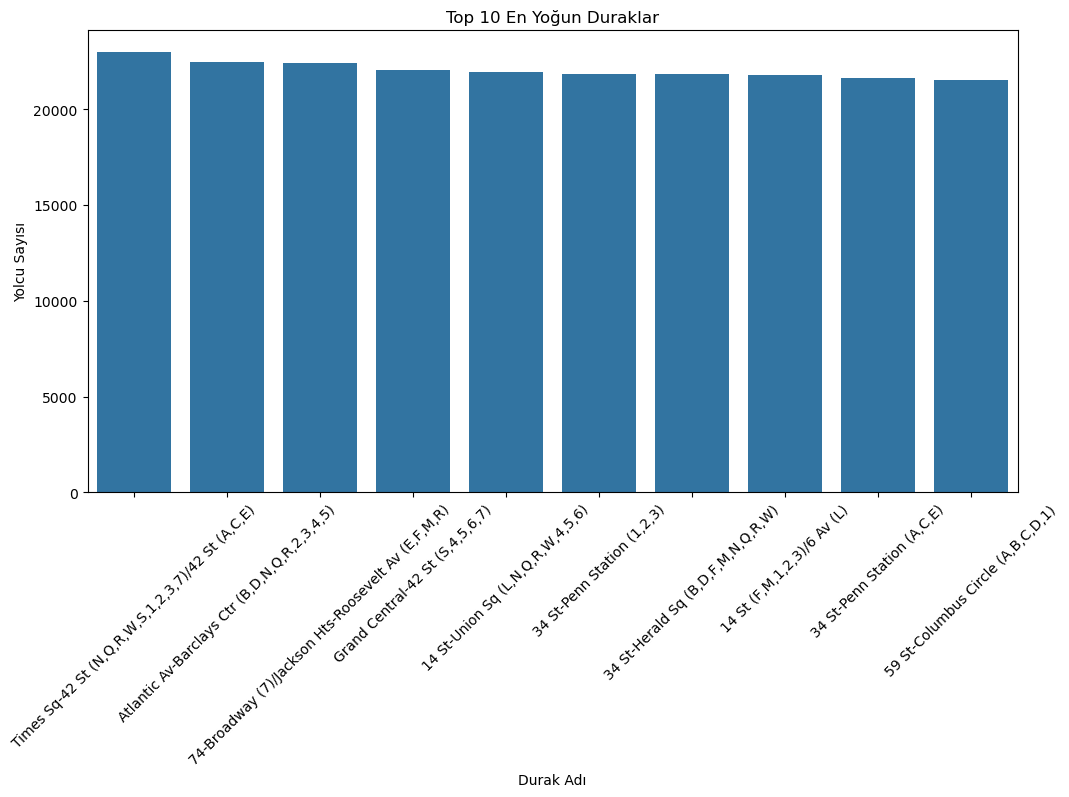

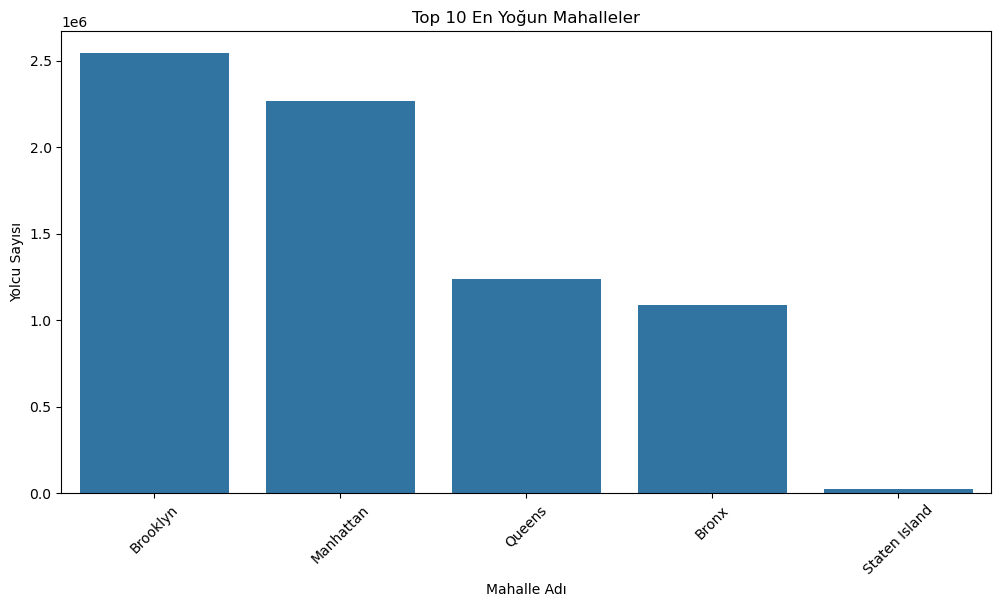

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# En yoğun 10 durak için bar grafiği
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stations.index, y=top_10_stations.values)
plt.title('Top 10 En Yoğun Duraklar')
plt.xlabel('Durak Adı')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=45)
plt.show()

# En yoğun 10 mahalle için bar grafiği
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_boroughs.index, y=top_10_boroughs.values)
plt.title('Top 10 En Yoğun Mahalleler')
plt.xlabel('Mahalle Adı')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=45)
plt.show()


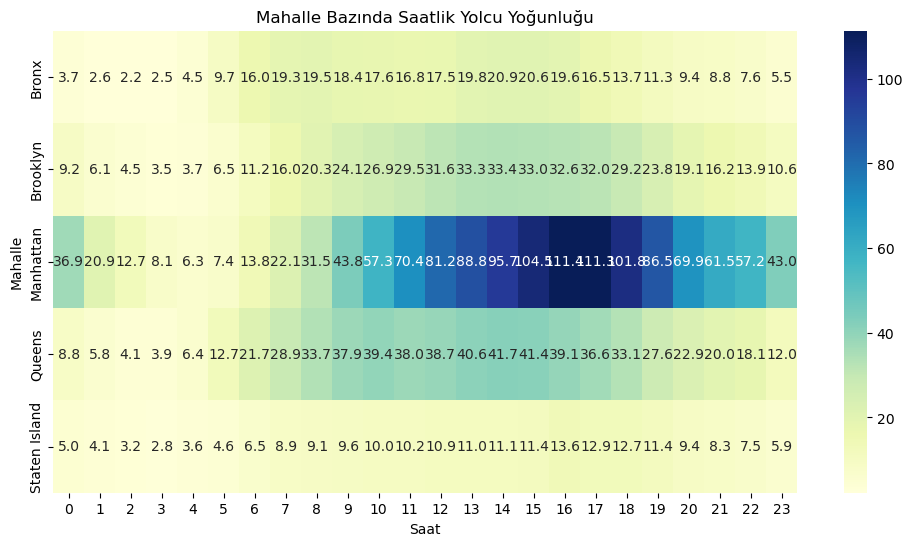

In [123]:
# Duraklar ve zaman dilimi arası ilişkileri görmek için pivot table kullanabilirsiniz
df_nyc['hour'] = df_nyc['datetime'].dt.hour  # Saat bilgisi çıkar
pivot_data = df_nyc.pivot_table(index='borough', columns='hour', values='ridership', aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Mahalle Bazında Saatlik Yolcu Yoğunluğu')
plt.xlabel('Saat')
plt.ylabel('Mahalle')
plt.show()


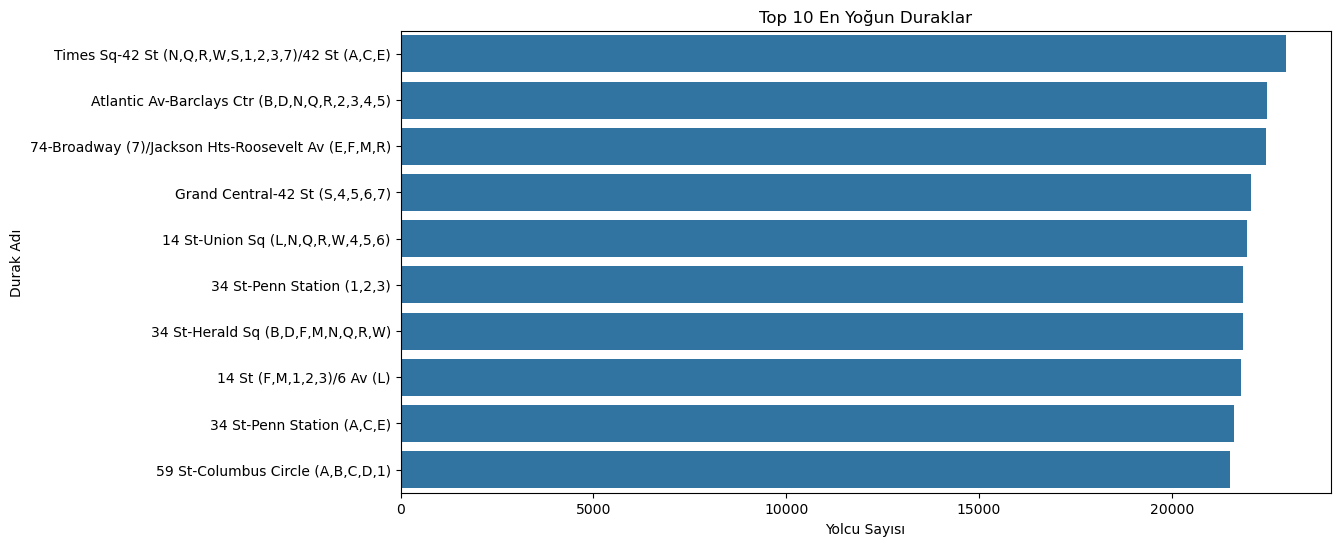

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# En yoğun 10 durak için bar grafiği (x ve y eksenlerini değiştirdik)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_stations.index, x=top_10_stations.values)

# Grafiği özelleştirme
plt.title('Top 10 En Yoğun Duraklar')
plt.ylabel('Durak Adı')
plt.xlabel('Yolcu Sayısı')

# Grafiği gösterme
plt.show()


In [127]:
# 'borough' ve 'station_name' kolonlarına göre gruplama yapıp sayma işlemi
station_count = df_nyc.groupby(['borough', 'station_name']).size().reset_index(name='count')

# Sonuçları görüntüle
print(station_count)


           borough                    station_name  count
0            Bronx    138 St-Grand Concourse (4,5)  16654
1            Bronx  149 St-Grand Concourse (2,4,5)  18940
2            Bronx   161 St-Yankee Stadium (B,D,4)  19894
3            Bronx                      167 St (4)  18554
4            Bronx                    167 St (B,D)  11129
..             ...                             ...    ...
423         Queens      Vernon Blvd-Jackson Av (7)  16594
424         Queens            Woodhaven Blvd (J,Z)   9838
425         Queens            Woodhaven Blvd (M,R)  19372
426  Staten Island                 St George (SIR)  18724
427  Staten Island             Tompkinsville (SIR)   8931

[428 rows x 3 columns]


In [129]:
# 'borough' ve 'station_name' kolonlarına göre gruplama yapıp sayma işlemi
station_count = df_nyc.groupby(['borough', 'station_name']).size().reset_index(name='count')

# Her mahalle için en yoğun üç durakları seçmek
top_3_stations_per_borough = station_count.sort_values(by=['borough', 'count'], ascending=[True, False]) \
                                          .groupby('borough').head(3)

# Sonuçları görüntüle
print(top_3_stations_per_borough)


           borough                                       station_name  count
2            Bronx                      161 St-Yankee Stadium (B,D,4)  19894
53           Bronx                                    Parkchester (6)  19387
35           Bronx                                     Fordham Rd (4)  19265
94        Brooklyn       Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)  22460
165       Brooklyn                         Jay St-MetroTech (A,C,F,R)  20476
137       Brooklyn                           Crown Hts-Utica Av (3,4)  20325
342      Manhattan   Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)  22967
324      Manhattan                    Grand Central-42 St (S,4,5,6,7)  22063
242      Manhattan                   14 St-Union Sq (L,N,Q,R,W,4,5,6)  21949
371         Queens  74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...  22430
397         Queens                               Flushing-Main St (7)  20733
399         Queens                       Forest Hills-71 Av (E,F,M,R)  20565